In [4]:
import pandas

# Load a Data Set

This is a rather simple dataset. It is easy to get a good performance with even very simple classifiers.

In [5]:
features = ["Alcohol", "Malic acid", "Ash", "Alcalinity of ash",
    "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols",
    "Proanthocyanins", "Color intensity", "Hue",
    "OD280/OD315 of diluted wines", "Proline"]
target = 'Class'
df = pandas.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=[target] + features)

# Preprocess data

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
df_scaled = pandas.DataFrame(StandardScaler().fit_transform(df[features]), columns=features)
df_scaled[target] = df[target]

In [11]:
train_data_s, test_data_s = train_test_split(df_scaled, test_size=0.2)

In [12]:
N, _ = train_data_s.shape
N_test, _ = test_data_s.shape

# Bootstrapping: Bagging predictors

The third way we can use boot strapping is through bagging predictors

In [58]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(), n_estimators=10000)
bagging.fit(train_data_s[features], train_data_s[target])

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10000, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [59]:
# Now let's predict!

p_test = bagging.predict_proba(test_data_s[features])

In [60]:
import numpy
p_max = numpy.zeros(N_test)
for t in range(N_test):
    p_max[t] = max(p_test[t])

(array([ 1.,  1.,  0.,  0.,  1.,  1.,  0.,  2.,  0., 30.]),
 array([0.52254 , 0.570286, 0.618032, 0.665778, 0.713524, 0.76127 ,
        0.809016, 0.856762, 0.904508, 0.952254, 1.      ]),
 <a list of 10 Patch objects>)

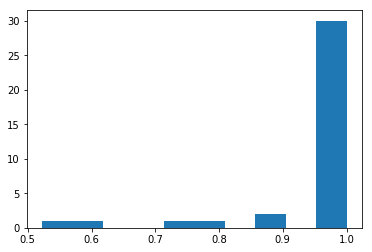

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(p_max)